# Task 3: Customer Segmentation / Clustering

### 1. Import the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

### 2. Load the datasets

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

### 3. Merge datasets for analysis

In [3]:
customer_transactions = transactions.merge(customers, on='CustomerID')

### 4. Aggregate data for clustering

In [4]:
customer_features = customer_transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Region': 'first'
}).reset_index()

### 5. Encode categorical data (Region)

In [5]:
customer_features = pd.get_dummies(customer_features, columns=['Region'])

### 6. Scale numerical features

In [6]:
scaler = StandardScaler()
numerical_cols = ['Quantity', 'TotalValue']
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

### 7. Prepare data for clustering

In [7]:
feature_matrix = customer_features.drop(columns=['CustomerID']).values

### 8. Perform clustering and evaluate DB Index 

In [8]:
best_db_index = float('inf')
best_k = None
best_model = None

In [9]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(feature_matrix)
    db_index = davies_bouldin_score(feature_matrix, labels)
    print(f'Number of Clusters: {k}, DB Index: {db_index:.4f}')

    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k
        best_model = kmeans

print(f'Optimal Number of Clusters: {best_k}, Best DB Index: {best_db_index:.4f}')

Number of Clusters: 2, DB Index: 0.9916
Number of Clusters: 3, DB Index: 1.2912
Number of Clusters: 4, DB Index: 1.4451
Number of Clusters: 5, DB Index: 1.3541
Number of Clusters: 6, DB Index: 1.1732
Number of Clusters: 7, DB Index: 1.1622
Number of Clusters: 8, DB Index: 0.9876
Number of Clusters: 9, DB Index: 1.0214
Number of Clusters: 10, DB Index: 0.9131
Optimal Number of Clusters: 10, Best DB Index: 0.9131


C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

### 9. Assign cluster labels to customers

In [10]:
customer_features['Cluster'] = best_model.labels_

### 10. Visualize clusters

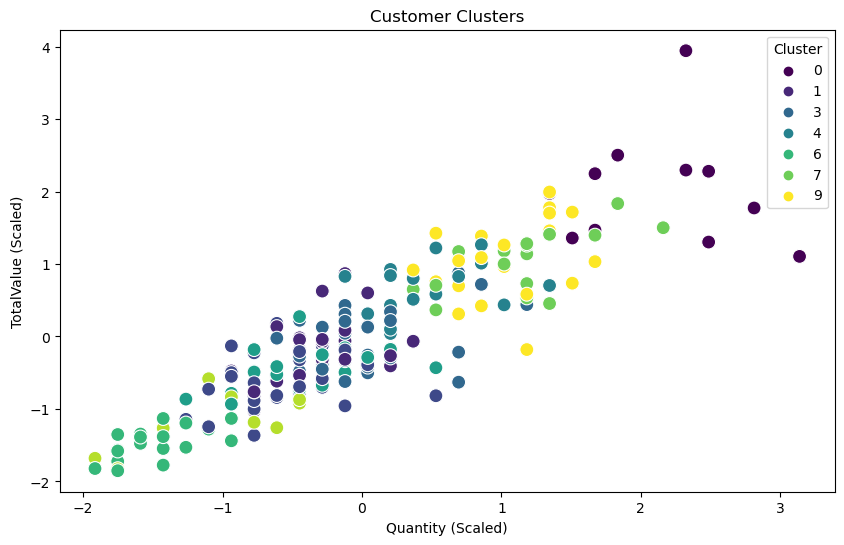

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['Quantity'],
    y=customer_features['TotalValue'],
    hue=customer_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Clusters')
plt.xlabel('Quantity (Scaled)')
plt.ylabel('TotalValue (Scaled)')
plt.legend(title='Cluster')
plt.show()

### 11. Save clustering results

In [12]:
customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)

# Generate report

In [13]:

report = f'''
Clustering Report:

Optimal Number of Clusters: {best_k}
Davies-Bouldin Index: {best_db_index:.4f}

The clustering was performed using KMeans with scaled numerical features and one-hot encoded categorical data.
Results and visualizations are saved in 'Customer_Clusters.csv' and displayed in the scatterplot above.
'''

In [14]:
with open('Clustering_Report.txt', 'w') as f:
    f.write(report)

In [15]:
print("Clustering analysis complete. Results saved to 'Customer_Clusters.csv' and 'Clustering_Report.txt'.")

Clustering analysis complete. Results saved to 'Customer_Clusters.csv' and 'Clustering_Report.txt'.


In [16]:
df = pd.read_csv("Customer_Clusters.csv")

In [17]:
df

,CustomerID,Cluster
0,C0001,1
1,C0002,5
2,C0003,1
3,C0004,9
4,C0005,5
...,...,...
194,C0196,4
195,C0197,2
196,C0198,6
197,C0199,2


In [18]:
with open('Clustering_Report.txt', 'r') as f:
    print(f.read())


Clustering Report:

Optimal Number of Clusters: 10
Davies-Bouldin Index: 0.9131

The clustering was performed using KMeans with scaled numerical features and one-hot encoded categorical data.
Results and visualizations are saved in 'Customer_Clusters.csv' and displayed in the scatterplot above.



In [19]:
print(df.head())

  CustomerID  Cluster
0      C0001        1
1      C0002        5
2      C0003        1
3      C0004        9
4      C0005        5
